<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/%EC%A3%BC%EC%8B%9D%EA%B0%80%EA%B2%A9(Lv_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - 주식가격
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42584)

## 문제 설명

초 단위로 기록된 주식가격이 담긴 배열 prices가 매개변수로 주어질 때, 가격이 떨어지지 않은 기간은 몇 초인지를 return 하도록 solution 함수를 완성하세요.

## 제한사항

- prices의 각 가격은 1 이상 10,000 이하인 자연수입니다.
- prices의 길이는 2 이상 100,000 이하입니다.

## 입출력 예

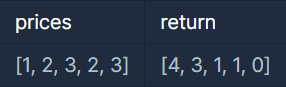

## 입출력 예 설명

- 1초 시점의 ₩1은 끝까지 가격이 떨어지지 않았습니다.
- 2초 시점의 ₩2은 끝까지 가격이 떨어지지 않았습니다.
- 3초 시점의 ₩3은 1초뒤에 가격이 떨어집니다. 따라서 1초간 가격이 떨어지지 않은 것으로 봅니다.
- 4초 시점의 ₩2은 1초간 가격이 떨어지지 않았습니다.
- 5초 시점의 ₩3은 0초간 가격이 떨어지지 않았습니다.



## 첫 번째 방법

1. 이중 for문으로 prices의 원소가 다음 원소보다 크면 idx를 카운트한 후 answer에 append.
2. 각 원소가 다음 원소고 넘어가며 카운트가 되는 방식이라 마지막 원소는 넘어갈 원소가 없기 때문에 answer의 마지막 원소를 0이 돼야해서 answer에 0을 append한 후 return.

결과 : 성공

In [29]:
def solution(prices):
    answer = []
    for i in range(len(prices) - 1):
        idx = 0
        for j in range(i, len(prices) - 1):
            if prices[i] <= prices[j]:
                idx += 1
            else:
                break
        answer.append(idx)
    answer.append(0)
    return answer
solution([1, 2, 3, 2, 3])

[4, 3, 1, 1, 0]

## 다른 사람의 풀이

로직을 이중 for문으로 구성하지 않고 스택을 활용하여 시간복잡도를 O(N^2) 에서 O(N)으로 최소화한 출제자의 의도를 파악한 코드 같음. 다만 파이썬에선 and 앞에 조건이 False면 뒤에 조건을 실행하지 않기 때문에 코드의 5라인은 굳이 필요한 코드가 아니라 5라인만 지워주면 가장 알맞은 풀이일 것임.


In [ ]:
def solution(prices):
    stack = []
    answer = [0] * len(prices)
    for i in range(len(prices)):
        if stack != []:
            while stack != [] and stack[-1][1] > prices[i]:
                past, _ = stack.pop()
                answer[past] = i - past
        stack.append([i, prices[i]])
    for i, s in stack:
        answer[i] = len(prices) - 1 - i
    return answer